# Money creation example 3: Non-bank lending
This notebook demonstrates how non-bank lending (here in the form of a primary market purchase of a government bond by a private sector agent) leaves total money stocks unaffected.

We start by importing required utilities.

In [1]:
import os
import sys

base_path = os.path.realpath(os.getcwd()+"/../..")
sys.path.append(base_path)

from abcFinance import Ledger, Account, AccountSide

## Declaration of agents
We start by defining their agents and the accounts on their balance sheets:

In [2]:
bank = Ledger(residual_account_name="Equity")
private_agent = Ledger(residual_account_name="Equity")
government = Ledger(residual_account_name="Equity")

bank.make_asset_accounts(['Reserves'])
bank.make_liability_accounts(['Customer Deposits', 'Government Deposits'])

private_agent.make_asset_accounts(['Deposits','Government Bonds'])

government.make_asset_accounts(['Deposits'])
government.make_liability_accounts(['Bonds'])

We further define a function that computes the money stocks according to our defined taxonomy:

In [3]:
from IPython.core.display import SVG
from IPython.display import display_svg

def print_money_stocks():
    # Bank money: bank liabilities that are money
    bank_money = bank.get_balance('Customer Deposits')[1]
    bank_money += bank.get_balance('Government Deposits')[1]
        
    print("Total (Bank) Money:",bank_money)

def print_balance_sheets_and_money_stocks():
    bank_balance_sheet = SVG(bank.draw_balance_sheet("Bank Balance Sheet", width=450))
    private_agent_balance_sheet = SVG(private_agent.draw_balance_sheet("Private Agent Balance Sheet", width=450))
    
    if government.get_total_assets() > 0:
        government_balance_sheet = SVG(government.draw_balance_sheet("Government Balance Sheet", width=450))
        display_svg(bank_balance_sheet, private_agent_balance_sheet, government_balance_sheet)
    else:
        display_svg(bank_balance_sheet, private_agent_balance_sheet)
        
    print_money_stocks()

## Start of the example
We start by endowing the private sector agent with money holdings. The government starts with an empty balance sheet. The bank's balance sheet only reflects the money holdings by the private sector agent. We omit the central bank balance sheet for brevity.

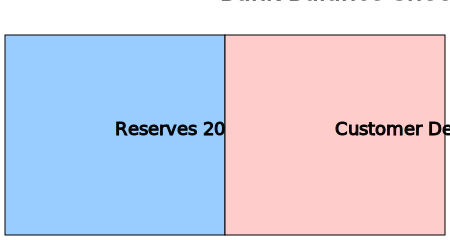

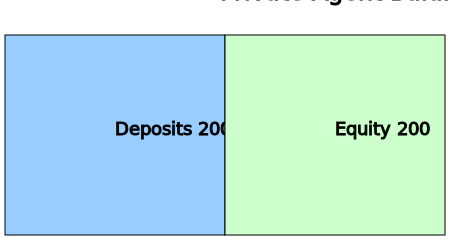

Total (Bank) Money: 200


In [4]:
bank.book(debit=[('Reserves',200)],credit=[('Customer Deposits',200)])
private_agent.book(debit=[('Deposits',200)],credit=[('Equity',200)])
bank.book_end_of_period()
private_agent.book_end_of_period()
print_balance_sheets_and_money_stocks()

The private sector agent now uses some of its money holdings to purchase a newly issued bond directly from the government. The transaction reallocates money holdings from the household to the government, leaving total money stocks unaffected:

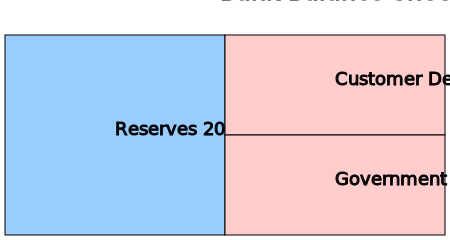

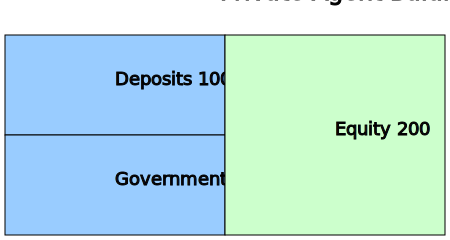

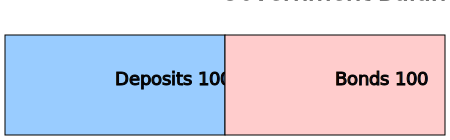

Total (Bank) Money: 200


In [5]:
private_agent.book(debit=[('Government Bonds',100)],credit=[('Deposits',100)])
bank.book(debit=[('Customer Deposits',100)],credit=[('Government Deposits',100)])
government.book(debit=[('Deposits',100)],credit=[('Bonds',100)])
print_balance_sheets_and_money_stocks()